In [3]:
import numpy as np
import pandas as pd

In [4]:
Students={
    'S_id':[1,2,3,4,5],
    'Stud_Name':['Shubham','Rahul','Raj','Rashi','Nitish']
    
}

In [8]:
Students=pd.DataFrame(Students)
Students

,S_id,Stud_Name
0,1,Shubham
1,2,Rahul
2,3,Raj
3,4,Rashi
4,5,Nitish


In [9]:
Courses={
    'C_id':[1,2,3],
    'Course_Name':['Python','C','Java'],
    'price':[100,80,120]
    
}

In [11]:
Courses=pd.DataFrame(Courses)
Courses

,C_id,Course_Name,price
0,1,Python,100
1,2,C,80
2,3,Java,120


In [13]:
Enroll={
    'C_id':[1,2,2,3,3,3,4],
    'S_id':[3,1,3,3,4,6,1]
    
}

In [15]:
Enroll=pd.DataFrame(Enroll)
Enroll

,C_id,S_id
0,1,3
1,2,1
2,2,3
3,3,3
4,3,4
5,3,6
6,4,1


In [16]:
# inner join
Students.merge(Enroll,how='inner',on='S_id') 

,S_id,Stud_Name,C_id
0,1,Shubham,2
1,1,Shubham,4
2,3,Raj,1
3,3,Raj,2
4,3,Raj,3
5,4,Rashi,3


In [17]:
# Left join
Students.merge(Enroll,how='left',on='S_id')

,S_id,Stud_Name,C_id
0,1,Shubham,2.0
1,1,Shubham,4.0
2,2,Rahul,NaN
3,3,Raj,1.0
4,3,Raj,2.0
5,3,Raj,3.0
6,4,Rashi,3.0
7,5,Nitish,NaN


In [18]:
# right join
Enroll.merge(Students,how='right',on='S_id')

,C_id,S_id,Stud_Name
0,2.0,1,Shubham
1,4.0,1,Shubham
2,NaN,2,Rahul
3,1.0,3,Raj
4,2.0,3,Raj
5,3.0,3,Raj
6,3.0,4,Rashi
7,NaN,5,Nitish


In [19]:
# Full Outer join
Students.merge(Enroll,how='outer',on='S_id')

,S_id,Stud_Name,C_id
0,1,Shubham,2.0
1,1,Shubham,4.0
2,2,Rahul,NaN
3,3,Raj,1.0
4,3,Raj,2.0
5,3,Raj,3.0
6,4,Rashi,3.0
7,5,Nitish,NaN
8,6,NaN,3.0


In [20]:
Students.merge(Enroll,how='left',on='S_id').merge(Courses,how='right', on='C_id')

,S_id,Stud_Name,C_id,Course_Name,price
0,3,Raj,1.0,Python,100
1,1,Shubham,2.0,C,80
2,3,Raj,2.0,C,80
3,3,Raj,3.0,Java,120
4,4,Rashi,3.0,Java,120


In [21]:
Courses.merge(Enroll,how='left',on='C_id')

,C_id,Course_Name,price,S_id
0,1,Python,100,3
1,2,C,80,1
2,2,C,80,3
3,3,Java,120,3
4,3,Java,120,4
5,3,Java,120,6


In [22]:
#Total revenue generated 
Enroll.merge(Courses,how='left',on='C_id')['price'].sum()

620.0

<AxesSubplot:xlabel='Course_Name'>

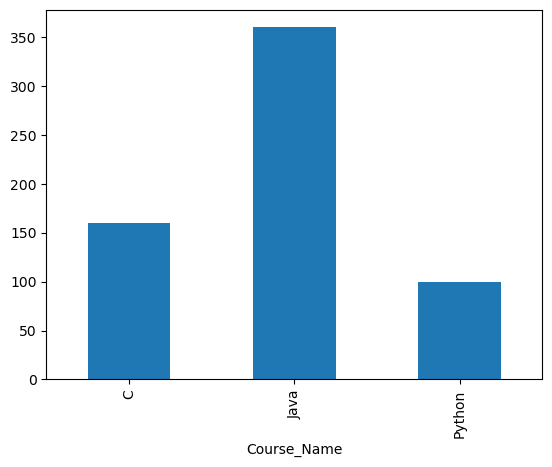

In [23]:
# Revenue generated by each courses
Enroll.merge(Courses,how='left',on='C_id').groupby('Course_Name')['price'].sum().plot(kind='bar')

<AxesSubplot:ylabel='Course_Name'>

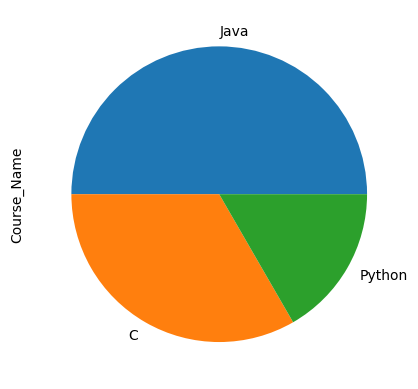

In [24]:
# which course has the maximum enroll 
Enroll.merge(Courses,how='left',on='C_id')['Course_Name'].value_counts().plot(kind='pie')

In [25]:
#Name of the student who didn't Enroll in any course
all_studs=Students.merge(Enroll,how='left',on='S_id')
all_studs[all_studs['C_id'].isna()]['Stud_Name']

2     Rahul
7    Nitish
Name: Stud_Name, dtype: object

In [26]:
#Name of the student who enroll in all the course 
Students.merge(Enroll,how='left',on='S_id')

,S_id,Stud_Name,C_id
0,1,Shubham,2.0
1,1,Shubham,4.0
2,2,Rahul,NaN
3,3,Raj,1.0
4,3,Raj,2.0
5,3,Raj,3.0
6,4,Rashi,3.0
7,5,Nitish,NaN


In [27]:
Enroll_studs=Enroll.merge(Students,how='left',on='S_id')
Enroll_studs.groupby(['S_id','Stud_Name'])['Stud_Name'].count().sort_values(ascending=False).head(1)

S_id  Stud_Name
3     Raj          3
Name: Stud_Name, dtype: int64